#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Imports

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import class_weight

#Path and constants

In [3]:
# Constants
base_path = '/content/drive/My Drive/Dataset' # Make sure to replace 'path_to_images' with the correct path
categories = ['category1_tumor', 'category2_tumor', 'category3_tumor', 'no_tumor']

#Load and Preprocess the Data

In [4]:
X = []
y = []

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_path, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (150, 150))
        X.append(img)
        y.append(idx)

X = np.array(X).reshape(-1, 150, 150, 1) / 255.0
y = to_categorical(y, num_classes=len(categories))



#Split the data

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Class Imbalance handle

In [6]:
# Compute class weights
class_weights =class_weight = {0:0.815, 1:0.868, 2:0.862, 3:2.17}

#Build the CNN models

###Model2

In [7]:
from tensorflow.keras.regularizers import L2
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1),padding='SAME'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


###Train Model2

In [8]:
history2 = model2.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), class_weight=class_weights)


Epoch 1/30
35/35 [==============================] - 16s 67ms/step - loss: 1.4448 - accuracy: 0.2367 - val_loss: 1.3125 - val_accuracy: 0.3573
Epoch 2/30
35/35 [==============================] - 1s 41ms/step - loss: 1.3340 - accuracy: 0.3020 - val_loss: 1.1783 - val_accuracy: 0.4186
Epoch 3/30
35/35 [==============================] - 1s 39ms/step - loss: 1.2403 - accuracy: 0.3211 - val_loss: 1.0453 - val_accuracy: 0.5307
Epoch 4/30
35/35 [==============================] - 1s 41ms/step - loss: 1.1956 - accuracy: 0.4739 - val_loss: 1.0028 - val_accuracy: 0.6025
Epoch 5/30
35/35 [==============================] - 1s 41ms/step - loss: 1.1342 - accuracy: 0.5333 - val_loss: 0.9556 - val_accuracy: 0.6638
Epoch 6/30
35/35 [==============================] - 1s 43ms/step - loss: 1.1256 - accuracy: 0.5211 - val_loss: 0.9655 - val_accuracy: 0.6554
Epoch 7/30
35/35 [==============================] - 2s 43ms/step - loss: 1.0481 - accuracy: 0.5737 - val_loss: 0.9216 - val_accuracy: 0.6786
Epoch 8/30
3

####Model2 Insights

####Model2 accuracy

In [9]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

15/15 [==============================] - 0s 9ms/step - loss: 0.9245 - accuracy: 0.8393
Test accuracy: 83.93%


####Insights

15/15 [==============================] - 0s 14ms/step
                 precision    recall  f1-score   support

category1_tumor       0.90      0.76      0.82       153
category2_tumor       0.80      0.82      0.81       135
category3_tumor       0.90      0.92      0.91       118
       no_tumor       0.73      0.91      0.81        67

       accuracy                           0.84       473
      macro avg       0.83      0.85      0.84       473
   weighted avg       0.85      0.84      0.84       473



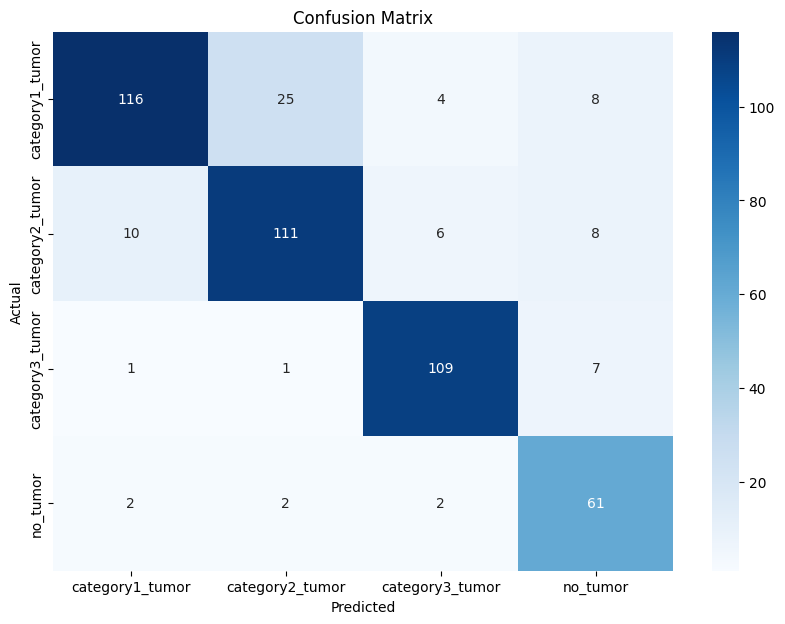

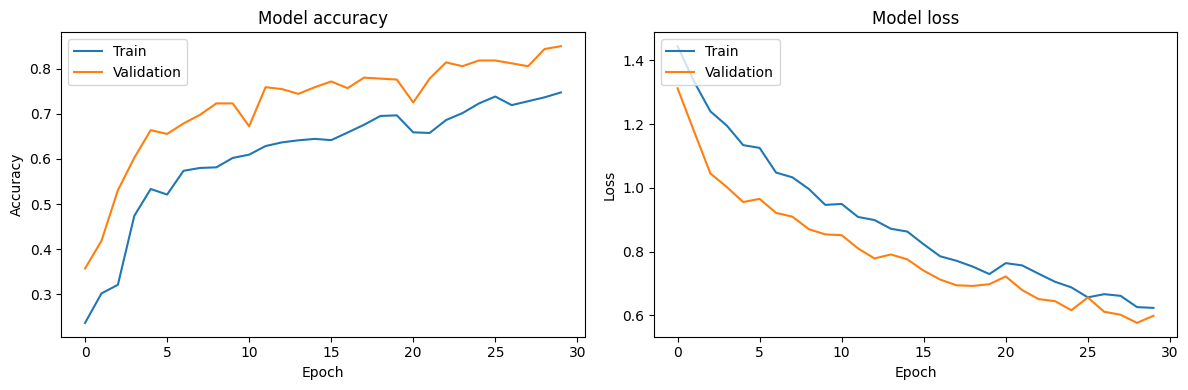

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Predictions on test data
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 2. Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

# 3. Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. Training history plots
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


####Save model2

In [ ]:
model2.save('/content/model2.h5')

##Model3

In [13]:
from tensorflow.keras.regularizers import L2
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1),padding='SAME'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    #MaxPooling2D((2, 2)),
    Flatten(),
    Dense(40, activation='relu'),
    Dense(12, activation='relu'),

    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


###Train Model3

In [14]:
history3 = model3.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), class_weight=class_weights)


Epoch 1/30
35/35 [==============================] - 5s 57ms/step - loss: 1.4124 - accuracy: 0.2245 - val_loss: 1.2633 - val_accuracy: 0.4101
Epoch 2/30
35/35 [==============================] - 1s 41ms/step - loss: 1.2739 - accuracy: 0.2739 - val_loss: 1.2035 - val_accuracy: 0.4101
Epoch 3/30
35/35 [==============================] - 1s 40ms/step - loss: 1.1910 - accuracy: 0.3546 - val_loss: 1.1051 - val_accuracy: 0.4376
Epoch 4/30
35/35 [==============================] - 1s 42ms/step - loss: 1.1469 - accuracy: 0.3741 - val_loss: 1.0228 - val_accuracy: 0.5032
Epoch 5/30
35/35 [==============================] - 1s 42ms/step - loss: 1.0946 - accuracy: 0.4222 - val_loss: 0.9108 - val_accuracy: 0.6490
Epoch 6/30
35/35 [==============================] - 1s 42ms/step - loss: 1.0600 - accuracy: 0.4862 - val_loss: 0.9262 - val_accuracy: 0.6490
Epoch 7/30
35/35 [==============================] - 1s 42ms/step - loss: 1.0065 - accuracy: 0.4912 - val_loss: 0.9124 - val_accuracy: 0.6723
Epoch 8/30
35

###Model3 Insights

####Model3 accuracy

In [15]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

15/15 [==============================] - 0s 11ms/step - loss: 0.7345 - accuracy: 0.8520
Test accuracy: 85.20%


####Insights

15/15 [==============================] - 0s 9ms/step
                 precision    recall  f1-score   support

category1_tumor       0.87      0.76      0.81       153
category2_tumor       0.76      0.81      0.78       135
category3_tumor       0.95      0.99      0.97       118
       no_tumor       0.83      0.90      0.86        67

       accuracy                           0.85       473
      macro avg       0.85      0.86      0.86       473
   weighted avg       0.85      0.85      0.85       473



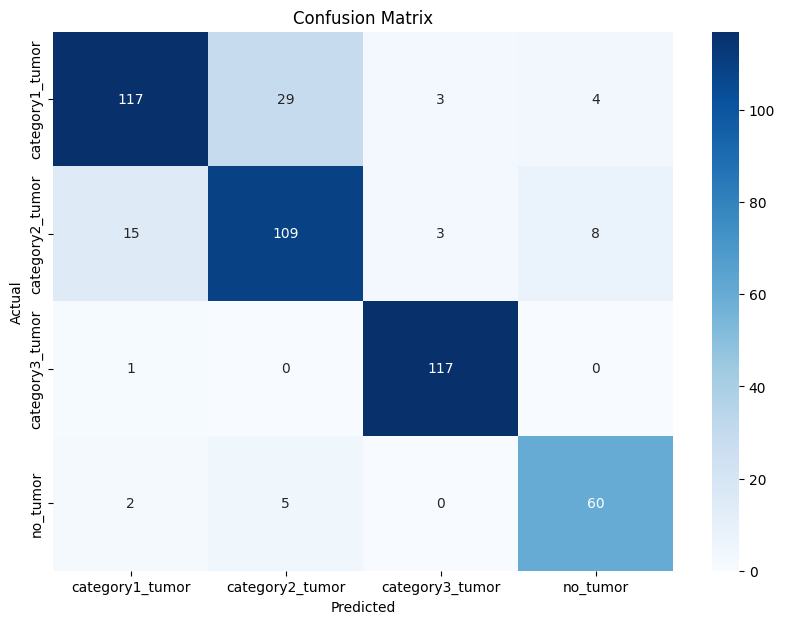

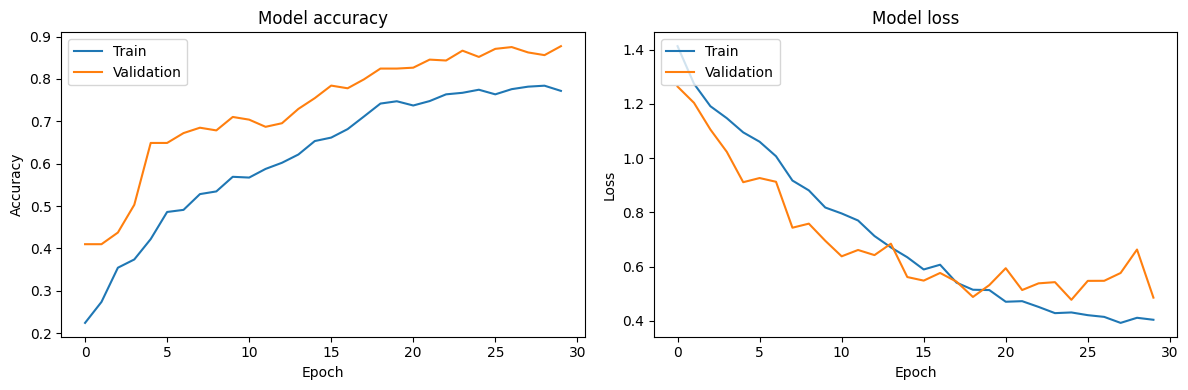

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Predictions on test data
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 2. Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

# 3. Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. Training history plots
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


####Save model3

In [ ]:
model3.save('/content/model3.h5')

##Model 1

In [17]:
from tensorflow.keras.regularizers import L2
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1),padding='SAME'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(12, activation='relu'),

    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


###Train the model1


In [18]:
history = model1.fit(X_train, y_train, epochs=40, batch_size=60, validation_data=(X_val, y_val), class_weight=class_weights)


Epoch 1/40
37/37 [==============================] - 6s 72ms/step - loss: 1.4539 - accuracy: 0.2440 - val_loss: 1.2465 - val_accuracy: 0.4165
Epoch 2/40
37/37 [==============================] - 1s 39ms/step - loss: 1.3141 - accuracy: 0.3066 - val_loss: 1.1139 - val_accuracy: 0.5708
Epoch 3/40
37/37 [==============================] - 1s 39ms/step - loss: 1.1746 - accuracy: 0.3873 - val_loss: 0.9467 - val_accuracy: 0.6554
Epoch 4/40
37/37 [==============================] - 1s 40ms/step - loss: 1.1094 - accuracy: 0.4639 - val_loss: 0.9111 - val_accuracy: 0.6850
Epoch 5/40
37/37 [==============================] - 1s 39ms/step - loss: 1.0414 - accuracy: 0.5211 - val_loss: 0.8131 - val_accuracy: 0.6786
Epoch 6/40
37/37 [==============================] - 1s 38ms/step - loss: 1.0001 - accuracy: 0.5161 - val_loss: 0.8162 - val_accuracy: 0.6406
Epoch 7/40
37/37 [==============================] - 1s 39ms/step - loss: 0.9469 - accuracy: 0.5560 - val_loss: 0.7212 - val_accuracy: 0.7040
Epoch 8/40
37

###Model1 Insigts

####Accuracy

In [19]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

15/15 [==============================] - 0s 10ms/step - loss: 0.8738 - accuracy: 0.8964
Test accuracy: 89.64%


####Insights

15/15 [==============================] - 0s 9ms/step
                 precision    recall  f1-score   support

category1_tumor       0.88      0.90      0.89       153
category2_tumor       0.88      0.83      0.85       135
category3_tumor       0.98      0.97      0.97       118
       no_tumor       0.82      0.91      0.87        67

       accuracy                           0.90       473
      macro avg       0.89      0.90      0.90       473
   weighted avg       0.90      0.90      0.90       473



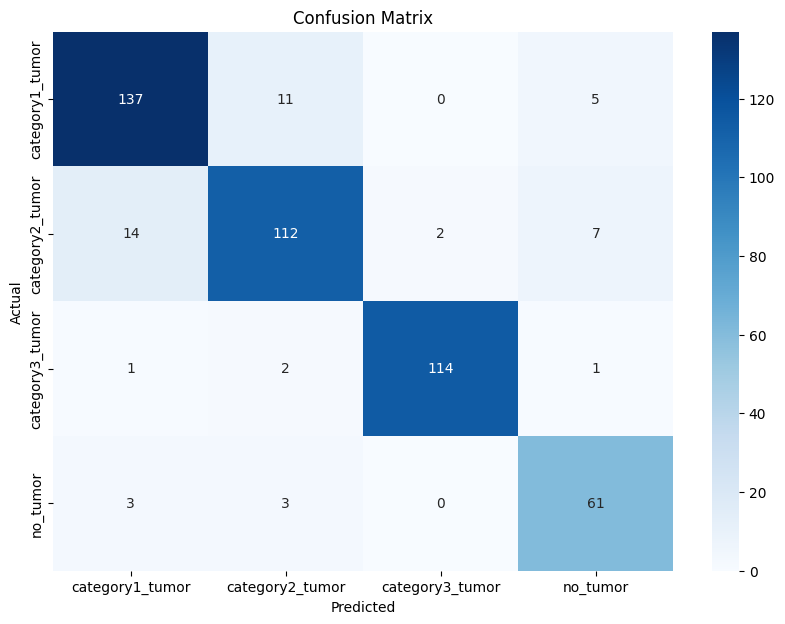

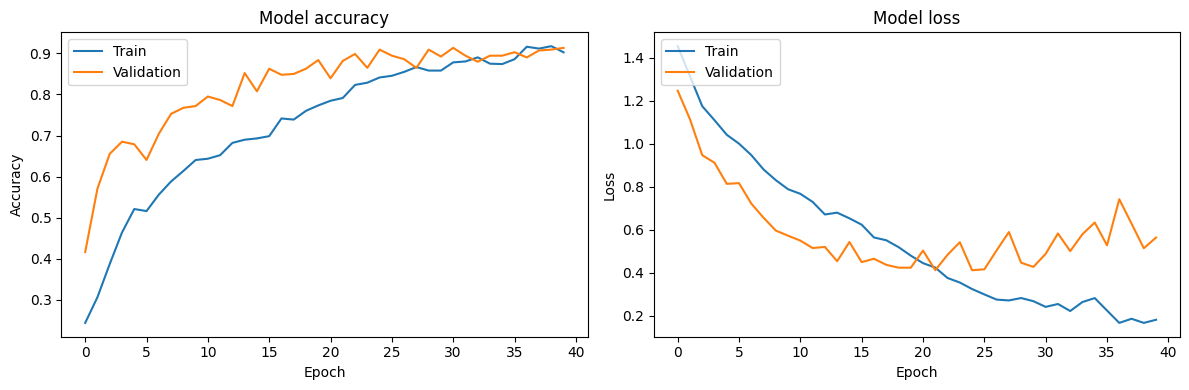

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Predictions on test data
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 2. Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

# 3. Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. Training history plots
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


####Save model1

In [21]:
model1.save('/content/model1.h5')